<a href="https://colab.research.google.com/github/IDI-RASIDI/1320123009-data-mining/blob/main/Tugas_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Prepariton

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import requests

# 1. Load Dataset [cite: 5]
# Asumsikan data Titanic sudah ada dalam file CSV

# Download the dataset if it's not present
try:
    with open('titanic_dataset.csv', 'r') as f:
        pass
except FileNotFoundError:
    print('Downloading titanic_dataset.csv...')
    url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
    response = requests.get(url)
    response.raise_for_status() # Ensure we got a successful response
    with open('titanic_dataset.csv', 'wb') as f:
        f.write(response.content)
    print('Download complete.')

data = pd.read_csv('titanic_dataset.csv')
target_col = 'Survived'

# Pisahkan fitur (X) dan target (y)
X = data.drop(target_col, axis=1)
y = data[target_col]

# Preprocessing: Tentukan kolom kategori dan numerik
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Buat Pipeline untuk preprocessing
numerical_pipeline = Pipeline([
    # Isi missing values numerik dengan median [cite: 6]
    ('imputer', SimpleImputer(strategy='median')),
    # Scaling data [cite: 6]
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    # Isi missing values kategori dengan modus
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # One-Hot Encoding [cite: 6]
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan pipeline preprocessing
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Terapkan preprocessing dan bagi data
X_processed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Bentuk data training: {X_train.shape}")
print(f"Bentuk data testing: {X_test.shape}")

Bentuk data training: (712, 12)
Bentuk data testing: (179, 12)


## 2. Model Implementation dan Comparison

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Implementasi Model
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Latih model
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 2. Model Comparison
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

print("--- Hasil Perbandingan Model ---")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

--- Hasil Perbandingan Model ---
Decision Tree Accuracy: 0.7821
Random Forest Accuracy: 0.8268
XGBoost Accuracy: 0.7877


## 3. Feature Importance Analysis

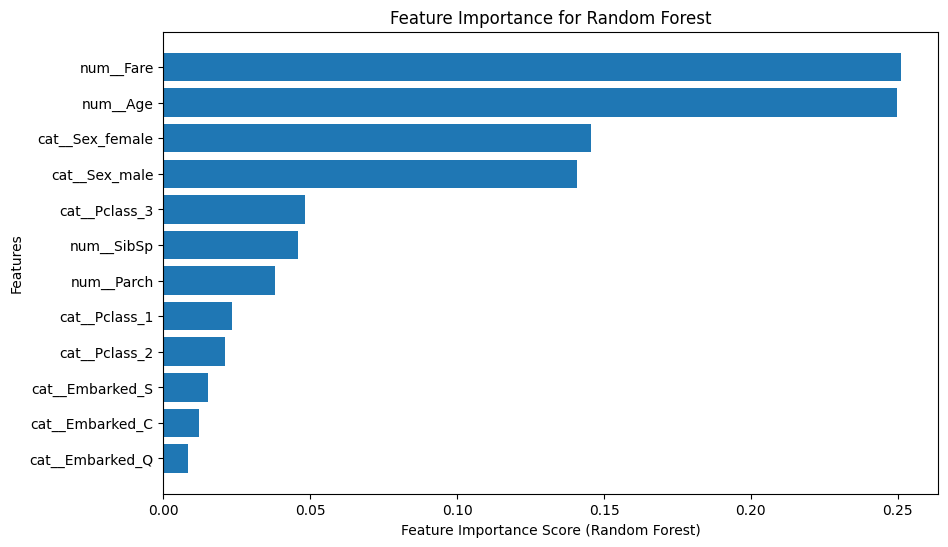

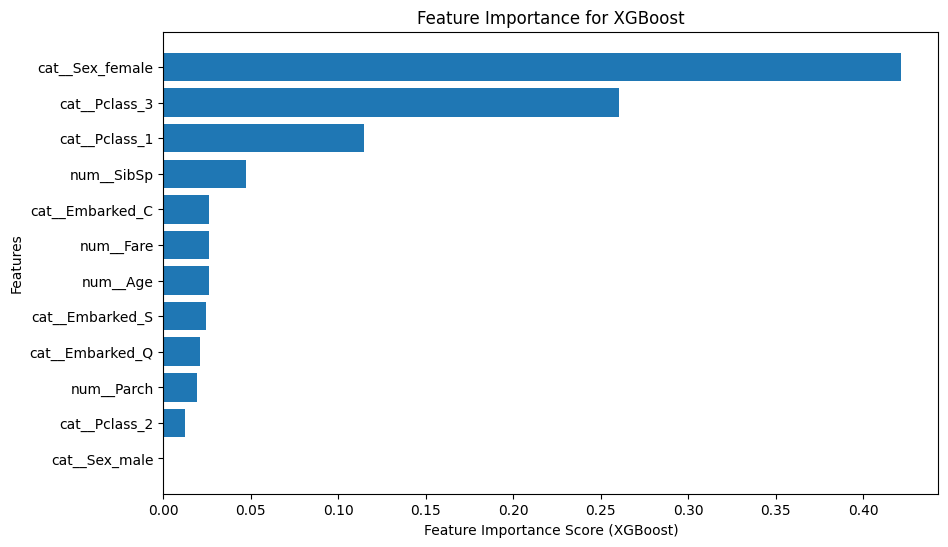

In [9]:
import matplotlib.pyplot as plt

# 1. Ambil nama fitur yang telah di-encode
# Note: feature_names didapatkan dari langkah preprocessing
feature_importance_rf = rf_model.feature_importances_
feature_importance_xgb = xgb_model.feature_importances_

# Fungsi untuk memplot feature importance
def plot_feature_importance(model_name, importance, features):
    # Sort fitur berdasarkan kepentingan
    sorted_idx = np.argsort(importance)[::-1]
    sorted_importance = importance[sorted_idx]
    sorted_features = features[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importance)
    plt.xlabel(f"Feature Importance Score ({model_name})")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {model_name}")
    plt.gca().invert_yaxis() # Fitur terpenting di atas
    plt.show()

# Plot untuk Random Forest [cite: 22]
plot_feature_importance('Random Forest', feature_importance_rf, feature_names)
# Plot untuk XGBoost [cite: 22]
plot_feature_importance('XGBoost', feature_importance_xgb, feature_names)

# 2. Analisis: Bandingkan hasil plot dari Random Forest dan XGBoost [cite: 23]